In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load cleaned data
df = pd.read_csv('telco_customer_churn_cleaned.csv')

# Display basic info
print("="*60)
print("TELCO CUSTOMER CHURN - EXPLORATORY DATA ANALYSIS")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Customers: {len(df):,}")
print(f"Total Features: {len(df.columns)}")

print("\n" + "="*60)
print("COLUMN NAMES:")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*60)
print("FIRST 5 ROWS:")
print("="*60)
df.head()

TELCO CUSTOMER CHURN - EXPLORATORY DATA ANALYSIS

Dataset Shape: (7043, 21)
Total Customers: 7,043
Total Features: 21

COLUMN NAMES:
 1. customerID
 2. gender
 3. SeniorCitizen
 4. Partner
 5. Dependents
 6. tenure
 7. PhoneService
 8. MultipleLines
 9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn

FIRST 5 ROWS:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


CHURN DISTRIBUTION ANALYSIS

Churn Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentages:
No: 73.46%
Yes: 26.54%

Total Churned Customers: 1,869
Total Retained Customers: 5,174
Churn Rate: 26.54%


/tmp/ipython-input-816512175.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'], ax=axes[0])


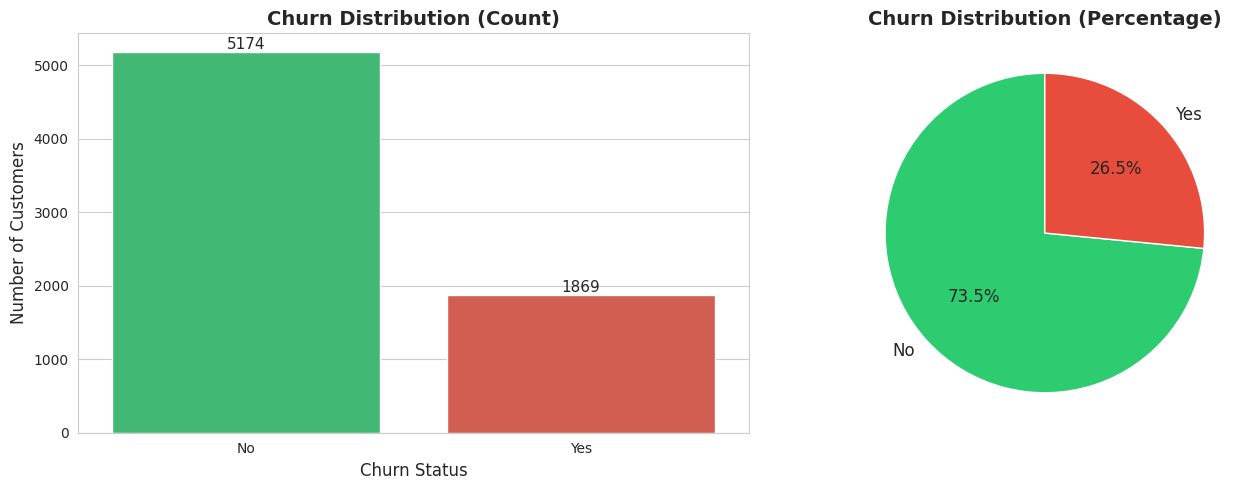


KEY INSIGHT:
⚠ High churn rate detected (26.54%)
  This indicates significant customer retention issues.


In [2]:
# ===== CHURN ANALYSIS =====

print("="*60)
print("CHURN DISTRIBUTION ANALYSIS")
print("="*60)

# Churn counts and percentages
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("\nChurn Counts:")
print(churn_counts)
print("\nChurn Percentages:")
for status, pct in churn_percentages.items():
    print(f"{status}: {pct:.2f}%")

print(f"\nTotal Churned Customers: {churn_counts['Yes']:,}")
print(f"Total Retained Customers: {churn_counts['No']:,}")
print(f"Churn Rate: {churn_percentages['Yes']:.2f}%")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', fontsize=11)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHT:")
print("="*60)
if churn_percentages['Yes'] > 20:
    print(f"⚠ High churn rate detected ({churn_percentages['Yes']:.2f}%)")
    print("  This indicates significant customer retention issues.")
else:
    print(f"✓ Churn rate is manageable ({churn_percentages['Yes']:.2f}%)")

DEMOGRAPHIC ANALYSIS - CHURN BY DEMOGRAPHICS

1. CHURN BY GENDER:
------------------------------------------------------------
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16

2. CHURN BY SENIOR CITIZEN STATUS:
------------------------------------------------------------
Churn          No    Yes
Not Senior  76.39  23.61
Senior      58.32  41.68

3. CHURN BY PARTNER STATUS:
------------------------------------------------------------
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66

4. CHURN BY DEPENDENTS STATUS:
------------------------------------------------------------
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45


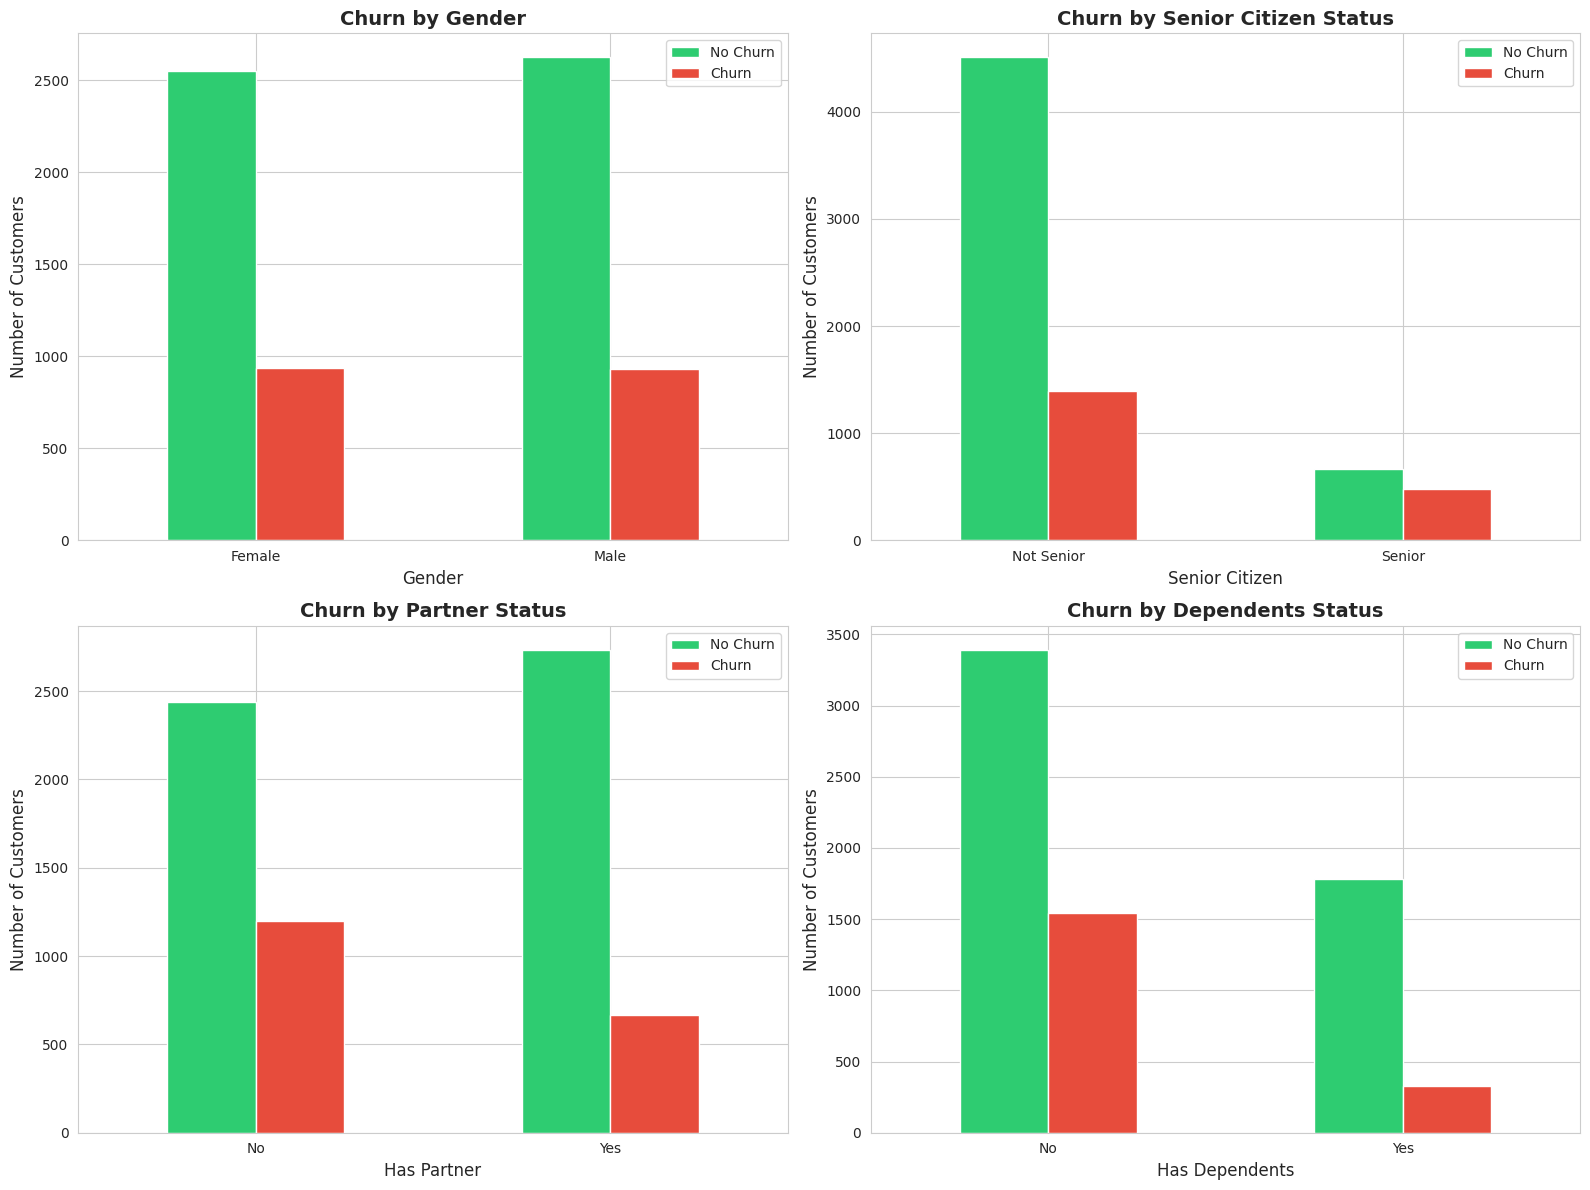


KEY INSIGHTS:
→ Senior citizens have 41.7% churn rate
→ Customers without partners have 33.0% churn rate
→ Customers without dependents have 31.3% churn rate


In [3]:
# ===== DEMOGRAPHIC ANALYSIS =====

print("="*60)
print("DEMOGRAPHIC ANALYSIS - CHURN BY DEMOGRAPHICS")
print("="*60)

# Analyze churn by Gender
print("\n1. CHURN BY GENDER:")
print("-" * 60)
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
print(gender_churn.round(2))

# Analyze churn by Senior Citizen
print("\n2. CHURN BY SENIOR CITIZEN STATUS:")
print("-" * 60)
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
senior_churn.index = ['Not Senior', 'Senior']
print(senior_churn.round(2))

# Analyze churn by Partner
print("\n3. CHURN BY PARTNER STATUS:")
print("-" * 60)
partner_churn = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
print(partner_churn.round(2))

# Analyze churn by Dependents
print("\n4. CHURN BY DEPENDENTS STATUS:")
print("-" * 60)
dependents_churn = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
print(dependents_churn.round(2))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gender
gender_data = df.groupby(['gender', 'Churn']).size().unstack()
gender_data.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Churn by Gender', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Gender', fontsize=12)
axes[0, 0].set_ylabel('Number of Customers', fontsize=12)
axes[0, 0].legend(['No Churn', 'Churn'], loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=0)

# Senior Citizen
senior_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_data.index = ['Not Senior', 'Senior']
senior_data.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_title('Churn by Senior Citizen Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Senior Citizen', fontsize=12)
axes[0, 1].set_ylabel('Number of Customers', fontsize=12)
axes[0, 1].legend(['No Churn', 'Churn'], loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=0)

# Partner
partner_data = df.groupby(['Partner', 'Churn']).size().unstack()
partner_data.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Churn by Partner Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Has Partner', fontsize=12)
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].legend(['No Churn', 'Churn'], loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=0)

# Dependents
dependents_data = df.groupby(['Dependents', 'Churn']).size().unstack()
dependents_data.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Churn by Dependents Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Has Dependents', fontsize=12)
axes[1, 1].set_ylabel('Number of Customers', fontsize=12)
axes[1, 1].legend(['No Churn', 'Churn'], loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"→ Senior citizens have {senior_churn.loc['Senior', 'Yes']:.1f}% churn rate")
print(f"→ Customers without partners have {partner_churn.loc['No', 'Yes']:.1f}% churn rate")
print(f"→ Customers without dependents have {dependents_churn.loc['No', 'Yes']:.1f}% churn rate")

SERVICE USAGE ANALYSIS - CHURN BY SERVICES

1. CHURN BY INTERNET SERVICE TYPE:
------------------------------------------------------------
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40

2. CHURN BY PHONE SERVICE:
------------------------------------------------------------
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71

3. CHURN BY ONLINE SECURITY:
------------------------------------------------------------
Churn                   No    Yes
OnlineSecurity                   
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61

4. CHURN BY TECH SUPPORT:
------------------------------------------------------------
Churn                   No    Yes
TechSupport                      
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  

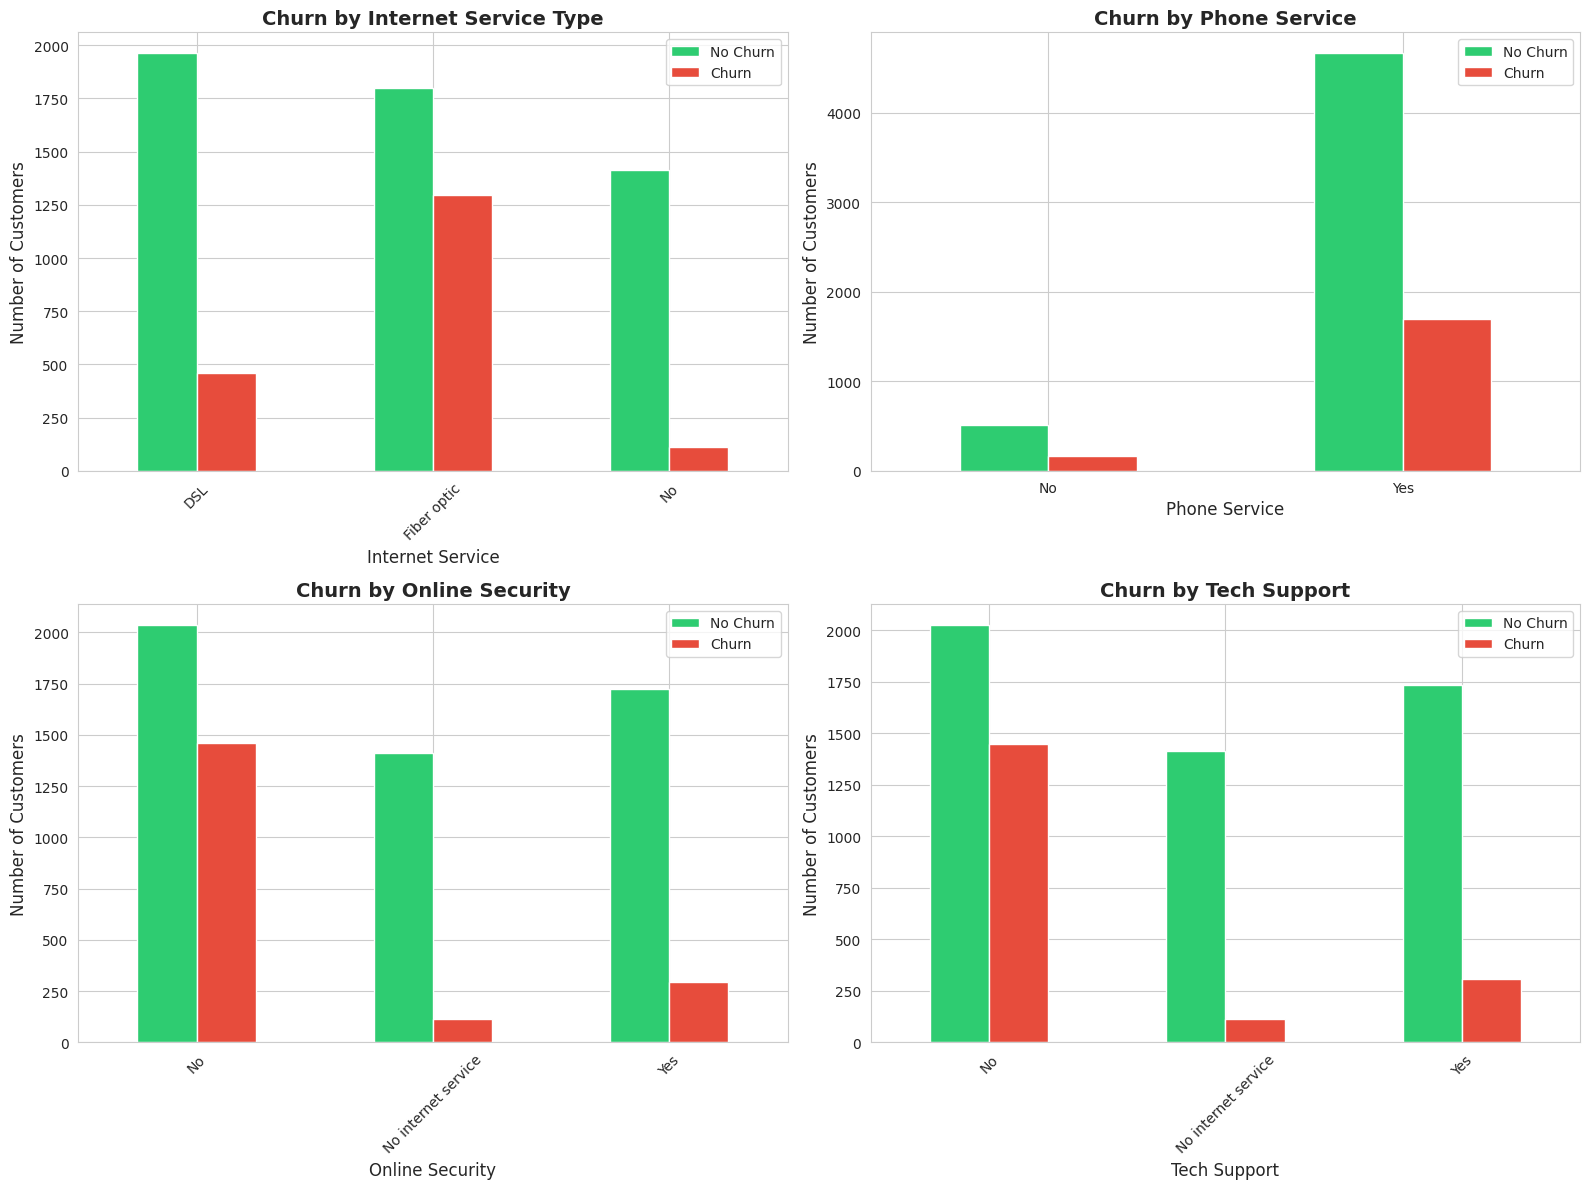


KEY INSIGHTS:
→ Fiber optic customers: 41.9% churn rate
→ Customers without online security: 41.8% churn rate
→ Customers without tech support: 41.6% churn rate


In [4]:
# ===== SERVICE USAGE ANALYSIS =====

print("="*60)
print("SERVICE USAGE ANALYSIS - CHURN BY SERVICES")
print("="*60)

# Analyze churn by Internet Service
print("\n1. CHURN BY INTERNET SERVICE TYPE:")
print("-" * 60)
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
print(internet_churn.round(2))

# Analyze churn by Phone Service
print("\n2. CHURN BY PHONE SERVICE:")
print("-" * 60)
phone_churn = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100
print(phone_churn.round(2))

# Analyze churn by Online Security
print("\n3. CHURN BY ONLINE SECURITY:")
print("-" * 60)
security_churn = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100
print(security_churn.round(2))

# Analyze churn by Tech Support
print("\n4. CHURN BY TECH SUPPORT:")
print("-" * 60)
tech_churn = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
print(tech_churn.round(2))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Internet Service
internet_data = df.groupby(['InternetService', 'Churn']).size().unstack()
internet_data.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Churn by Internet Service Type', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Internet Service', fontsize=12)
axes[0, 0].set_ylabel('Number of Customers', fontsize=12)
axes[0, 0].legend(['No Churn', 'Churn'], loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=45)

# Phone Service
phone_data = df.groupby(['PhoneService', 'Churn']).size().unstack()
phone_data.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_title('Churn by Phone Service', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Phone Service', fontsize=12)
axes[0, 1].set_ylabel('Number of Customers', fontsize=12)
axes[0, 1].legend(['No Churn', 'Churn'], loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=0)

# Online Security
security_data = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()
security_data.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Churn by Online Security', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Online Security', fontsize=12)
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].legend(['No Churn', 'Churn'], loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=45)

# Tech Support
tech_data = df.groupby(['TechSupport', 'Churn']).size().unstack()
tech_data.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Churn by Tech Support', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Tech Support', fontsize=12)
axes[1, 1].set_ylabel('Number of Customers', fontsize=12)
axes[1, 1].legend(['No Churn', 'Churn'], loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"→ Fiber optic customers: {internet_churn.loc['Fiber optic', 'Yes']:.1f}% churn rate")
print(f"→ Customers without online security: {security_churn.loc['No', 'Yes']:.1f}% churn rate")
print(f"→ Customers without tech support: {tech_churn.loc['No', 'Yes']:.1f}% churn rate")

CONTRACT AND PAYMENT ANALYSIS

1. CHURN BY CONTRACT TYPE:
------------------------------------------------------------
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

2. CHURN BY PAYMENT METHOD:
------------------------------------------------------------
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11

3. CHURN BY PAPERLESS BILLING:
------------------------------------------------------------
Churn                No    Yes
PaperlessBilling              
No                83.67  16.33
Yes               66.43  33.57


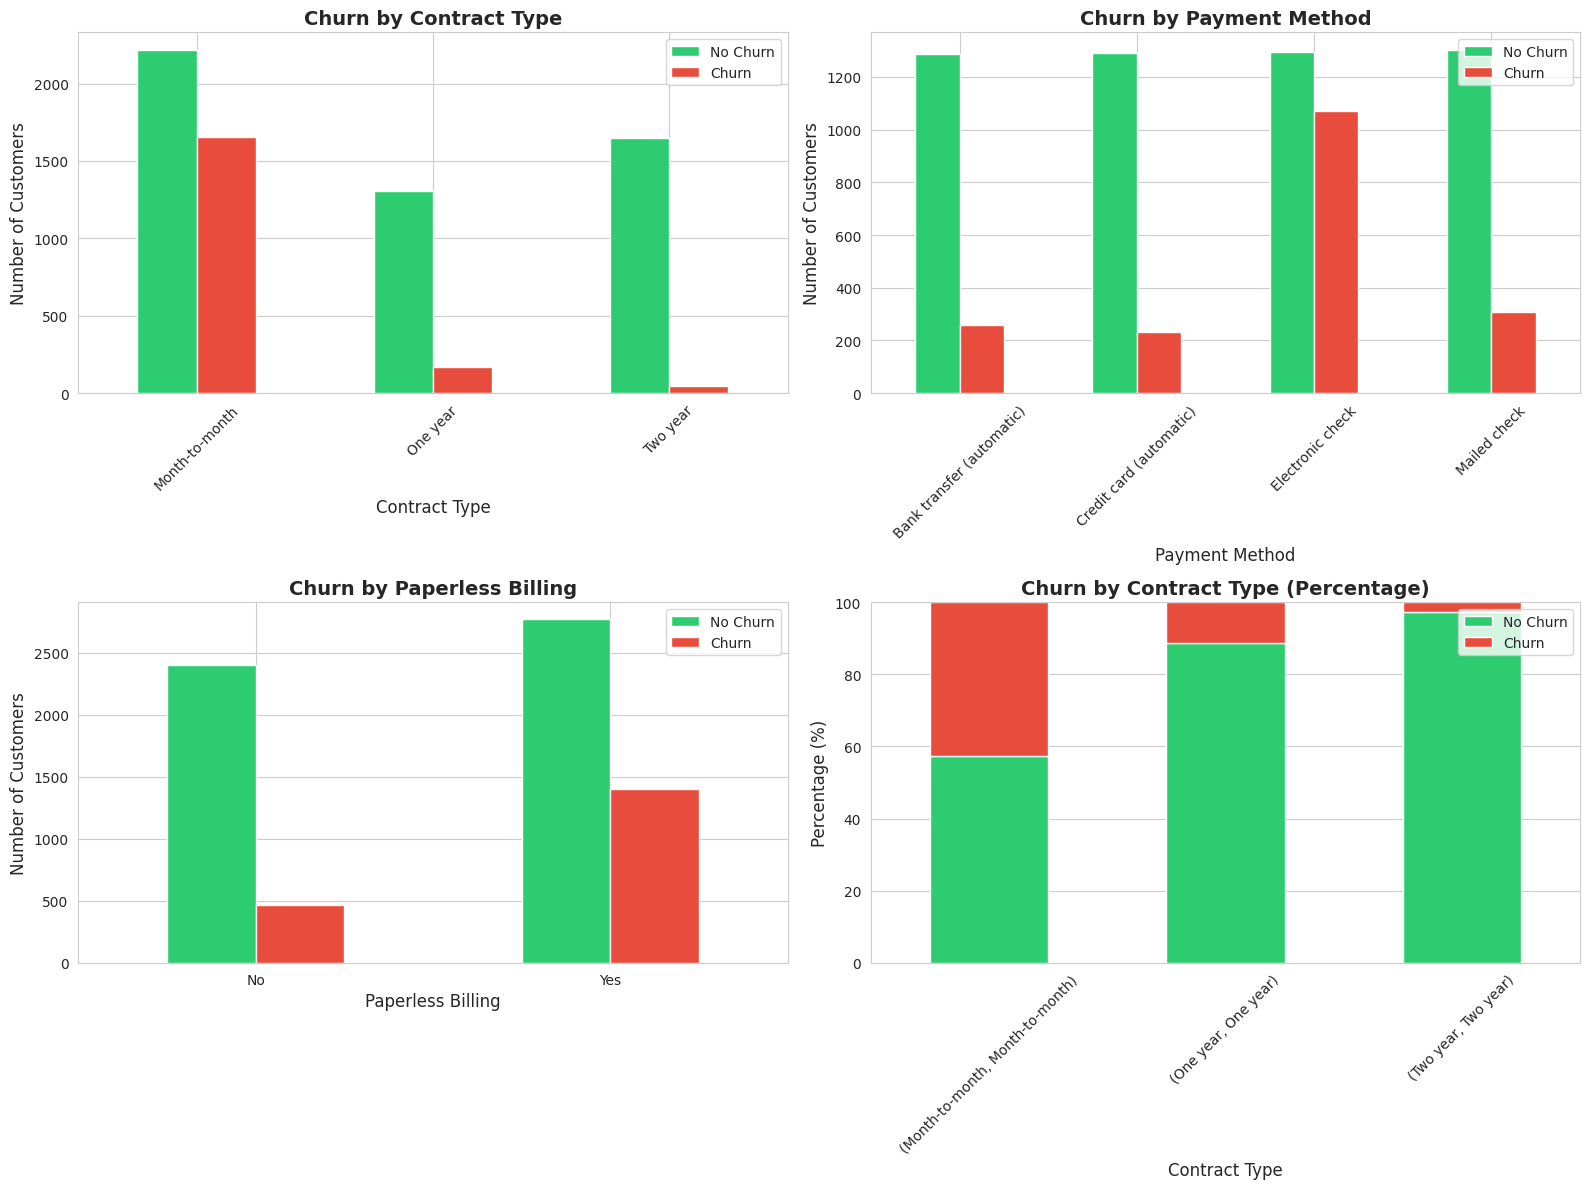


KEY INSIGHTS:
→ Month-to-month contracts: 42.7% churn rate
→ Two-year contracts: 2.8% churn rate
→ Electronic check payment: 45.3% churn rate
→ Paperless billing customers: 33.6% churn rate


In [5]:
# ===== CONTRACT AND PAYMENT ANALYSIS =====

print("="*60)
print("CONTRACT AND PAYMENT ANALYSIS")
print("="*60)

# Analyze churn by Contract Type
print("\n1. CHURN BY CONTRACT TYPE:")
print("-" * 60)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn.round(2))

# Analyze churn by Payment Method
print("\n2. CHURN BY PAYMENT METHOD:")
print("-" * 60)
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print(payment_churn.round(2))

# Analyze churn by Paperless Billing
print("\n3. CHURN BY PAPERLESS BILLING:")
print("-" * 60)
paperless_churn = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100
print(paperless_churn.round(2))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Contract Type
contract_data = df.groupby(['Contract', 'Churn']).size().unstack()
contract_data.plot(kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'])
axes[0, 0].set_title('Churn by Contract Type', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Contract Type', fontsize=12)
axes[0, 0].set_ylabel('Number of Customers', fontsize=12)
axes[0, 0].legend(['No Churn', 'Churn'], loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=45)

# Payment Method
payment_data = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
payment_data.plot(kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_title('Churn by Payment Method', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Payment Method', fontsize=12)
axes[0, 1].set_ylabel('Number of Customers', fontsize=12)
axes[0, 1].legend(['No Churn', 'Churn'], loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=45)

# Paperless Billing
paperless_data = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()
paperless_data.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Churn by Paperless Billing', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Paperless Billing', fontsize=12)
axes[1, 0].set_ylabel('Number of Customers', fontsize=12)
axes[1, 0].legend(['No Churn', 'Churn'], loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=0)

# Contract Type - Percentage view
contract_pct = df.groupby(['Contract', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()
contract_pct.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Churn by Contract Type (Percentage)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Contract Type', fontsize=12)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 1].legend(['No Churn', 'Churn'], loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"→ Month-to-month contracts: {contract_churn.loc['Month-to-month', 'Yes']:.1f}% churn rate")
print(f"→ Two-year contracts: {contract_churn.loc['Two year', 'Yes']:.1f}% churn rate")
print(f"→ Electronic check payment: {payment_churn.loc['Electronic check', 'Yes']:.1f}% churn rate")
print(f"→ Paperless billing customers: {paperless_churn.loc['Yes', 'Yes']:.1f}% churn rate")

FINANCIAL AND TENURE ANALYSIS

1. TENURE STATISTICS BY CHURN:
------------------------------------------------------------
        count   mean    std  min   25%   50%   75%   max
Churn                                                   
No     5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0

2. MONTHLY CHARGES STATISTICS BY CHURN:
------------------------------------------------------------
        count   mean    std    min    25%    50%   75%     max
Churn                                                         
No     5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75
Yes    1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35

3. TOTAL CHARGES STATISTICS BY CHURN:
------------------------------------------------------------
        count     mean      std    min    25%      50%      75%      max
Churn                                                                   
No     5174.0  2549.91  2329.95   0.00  572.9  16

/tmp/ipython-input-3553901695.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette=['#2ecc71', '#e74c3c'], ax=axes[1, 0])
/tmp/ipython-input-3553901695.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['#2ecc71', '#e74c3c'], ax=axes[1, 1])
/tmp/ipython-input-3553901695.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette=['#2ecc71', '#e74c3c'], ax=axes[1, 2])


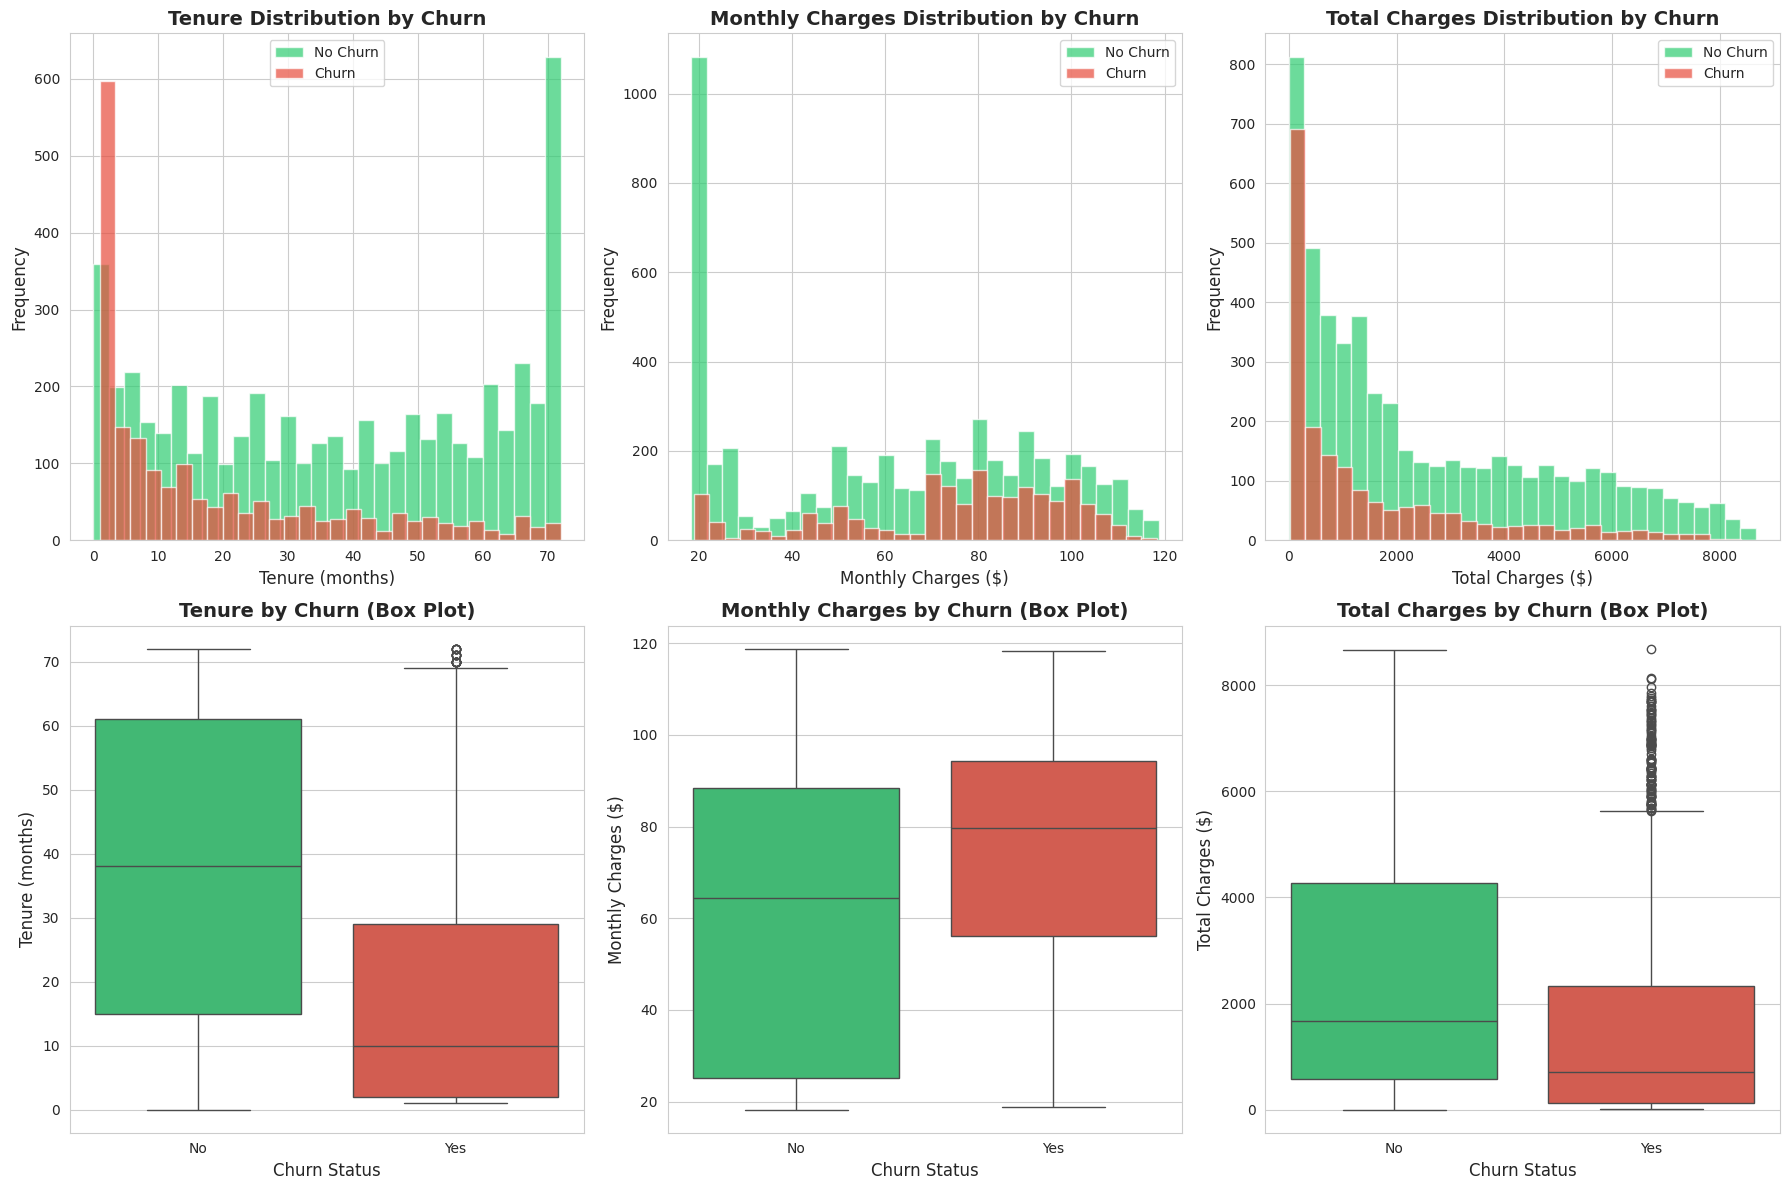


KEY INSIGHTS:
→ Average tenure for churned customers: 18.0 months
→ Average tenure for retained customers: 37.6 months
→ Average monthly charges for churned: $74.44
→ Average monthly charges for retained: $61.27
→ Churned customers pay $13.18 more per month on average


In [6]:
# ===== FINANCIAL AND TENURE ANALYSIS =====

print("="*60)
print("FINANCIAL AND TENURE ANALYSIS")
print("="*60)

# Tenure analysis
print("\n1. TENURE STATISTICS BY CHURN:")
print("-" * 60)
tenure_stats = df.groupby('Churn')['tenure'].describe()
print(tenure_stats.round(2))

# Monthly Charges analysis
print("\n2. MONTHLY CHARGES STATISTICS BY CHURN:")
print("-" * 60)
monthly_stats = df.groupby('Churn')['MonthlyCharges'].describe()
print(monthly_stats.round(2))

# Total Charges analysis
print("\n3. TOTAL CHARGES STATISTICS BY CHURN:")
print("-" * 60)
total_stats = df.groupby('Churn')['TotalCharges'].describe()
print(total_stats.round(2))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Tenure Distribution
df[df['Churn']=='No']['tenure'].hist(bins=30, ax=axes[0, 0], color='#2ecc71', alpha=0.7, label='No Churn')
df[df['Churn']=='Yes']['tenure'].hist(bins=30, ax=axes[0, 0], color='#e74c3c', alpha=0.7, label='Churn')
axes[0, 0].set_title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Tenure (months)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()

# Monthly Charges Distribution
df[df['Churn']=='No']['MonthlyCharges'].hist(bins=30, ax=axes[0, 1], color='#2ecc71', alpha=0.7, label='No Churn')
df[df['Churn']=='Yes']['MonthlyCharges'].hist(bins=30, ax=axes[0, 1], color='#e74c3c', alpha=0.7, label='Churn')
axes[0, 1].set_title('Monthly Charges Distribution by Churn', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Monthly Charges ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()

# Total Charges Distribution
df[df['Churn']=='No']['TotalCharges'].hist(bins=30, ax=axes[0, 2], color='#2ecc71', alpha=0.7, label='No Churn')
df[df['Churn']=='Yes']['TotalCharges'].hist(bins=30, ax=axes[0, 2], color='#e74c3c', alpha=0.7, label='Churn')
axes[0, 2].set_title('Total Charges Distribution by Churn', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Total Charges ($)', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].legend()

# Box plots
sns.boxplot(data=df, x='Churn', y='tenure', palette=['#2ecc71', '#e74c3c'], ax=axes[1, 0])
axes[1, 0].set_title('Tenure by Churn (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Churn Status', fontsize=12)
axes[1, 0].set_ylabel('Tenure (months)', fontsize=12)

sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['#2ecc71', '#e74c3c'], ax=axes[1, 1])
axes[1, 1].set_title('Monthly Charges by Churn (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Churn Status', fontsize=12)
axes[1, 1].set_ylabel('Monthly Charges ($)', fontsize=12)

sns.boxplot(data=df, x='Churn', y='TotalCharges', palette=['#2ecc71', '#e74c3c'], ax=axes[1, 2])
axes[1, 2].set_title('Total Charges by Churn (Box Plot)', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Churn Status', fontsize=12)
axes[1, 2].set_ylabel('Total Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print(f"→ Average tenure for churned customers: {tenure_stats.loc['Yes', 'mean']:.1f} months")
print(f"→ Average tenure for retained customers: {tenure_stats.loc['No', 'mean']:.1f} months")
print(f"→ Average monthly charges for churned: ${monthly_stats.loc['Yes', 'mean']:.2f}")
print(f"→ Average monthly charges for retained: ${monthly_stats.loc['No', 'mean']:.2f}")
print(f"→ Churned customers pay ${monthly_stats.loc['Yes', 'mean'] - monthly_stats.loc['No', 'mean']:.2f} more per month on average")

CORRELATION ANALYSIS

Correlation Matrix:
                SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen           1.000   0.017           0.220         0.103   
tenure                  0.017   1.000           0.248         0.826   
MonthlyCharges          0.220   0.248           1.000         0.651   
TotalCharges            0.103   0.826           0.651         1.000   
Churn_Numeric           0.151  -0.352           0.193        -0.198   

                Churn_Numeric  
SeniorCitizen           0.151  
tenure                 -0.352  
MonthlyCharges          0.193  
TotalCharges           -0.198  
Churn_Numeric           1.000  

------------------------------------------------------------
Correlation with Churn:
------------------------------------------------------------
MonthlyCharges      :  0.193
SeniorCitizen       :  0.151
TotalCharges        : -0.198
tenure              : -0.352


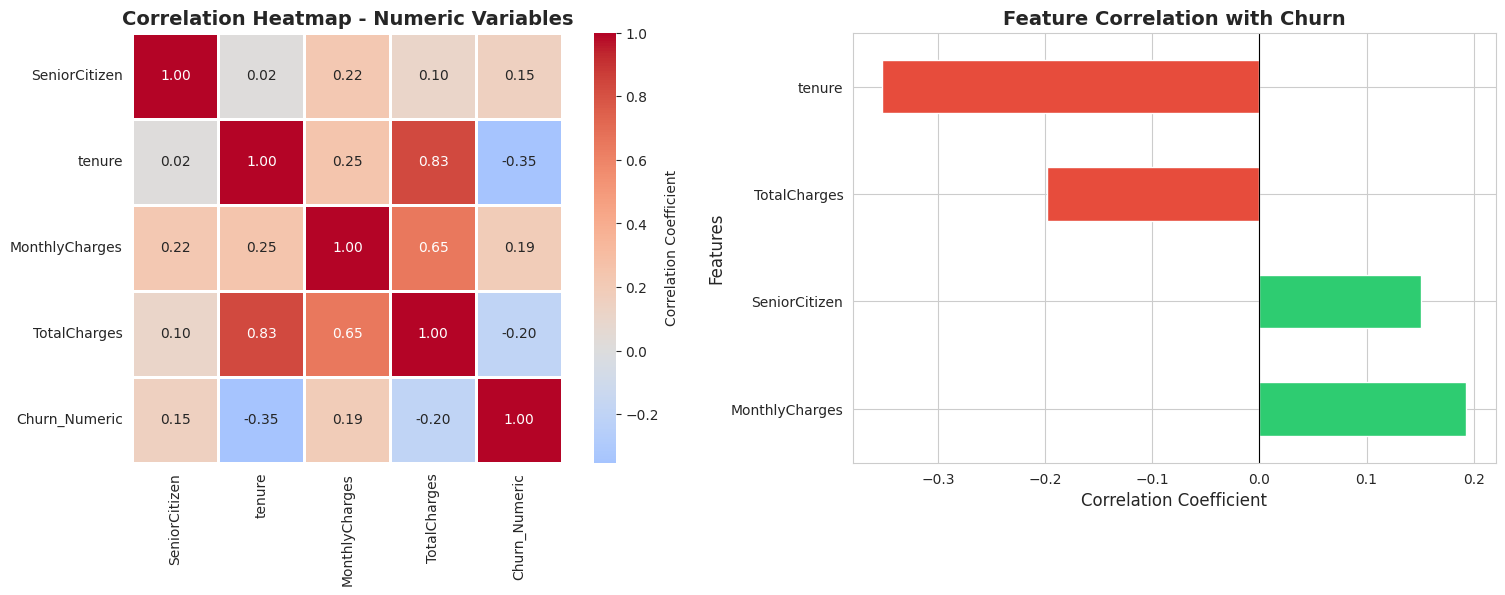


KEY INSIGHTS:
→ Strong negative correlation between tenure and churn (-0.352)
  Customers with longer tenure are less likely to churn
→ Positive correlation between monthly charges and churn (0.193)
  Higher monthly charges are associated with higher churn
→ Correlation between total charges and churn: -0.198


In [7]:
# ===== CORRELATION ANALYSIS =====

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Convert Churn to numeric for correlation
df_corr = df.copy()
df_corr['Churn_Numeric'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Select numeric columns
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Numeric']
correlation_matrix = df_corr[numeric_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(3))

print("\n" + "-" * 60)
print("Correlation with Churn:")
print("-" * 60)
churn_correlation = correlation_matrix['Churn_Numeric'].sort_values(ascending=False)
for col, corr in churn_correlation.items():
    if col != 'Churn_Numeric':
        print(f"{col:20s}: {corr:6.3f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, ax=axes[0],
            cbar_kws={'label': 'Correlation Coefficient'})
axes[0].set_title('Correlation Heatmap - Numeric Variables', fontsize=14, fontweight='bold')

# Correlation with Churn - Bar plot
churn_corr_plot = churn_correlation.drop('Churn_Numeric')
colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in churn_corr_plot.values]
churn_corr_plot.plot(kind='barh', ax=axes[1], color=colors)
axes[1].set_title('Feature Correlation with Churn', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=12)
axes[1].set_ylabel('Features', fontsize=12)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
if abs(churn_correlation['tenure']) > 0.3:
    print(f"→ Strong negative correlation between tenure and churn ({churn_correlation['tenure']:.3f})")
    print("  Customers with longer tenure are less likely to churn")

if abs(churn_correlation['MonthlyCharges']) > 0.15:
    print(f"→ Positive correlation between monthly charges and churn ({churn_correlation['MonthlyCharges']:.3f})")
    print("  Higher monthly charges are associated with higher churn")

if abs(churn_correlation['TotalCharges']) > 0.15:
    print(f"→ Correlation between total charges and churn: {churn_correlation['TotalCharges']:.3f}")